<a href="https://colab.research.google.com/github/Abhijit070707/-End-Course-Summative-Assignment/blob/main/AlmaBetter_Airbnb_Booking_Analysis_EDA_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT -- Airbnb Bookings Analysis**
**PROJRCT MEMBER** -- **Abhijit Santra**


**GITHUB LINK** --  


**# About The Project**

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.
This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.


1)**First we start with importing all libraries which we need in future use.**

In [ ]:
#Import package
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline

**2) Now we mount the drive and will import the dataset (Airbnb NYC 2009)**

In [ ]:
# Mount your drive and read the csv file. Make sure you are using the correct file path
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# loading csv File

file_path = '/content/drive/MyDrive/Airbnb NYC 2019.csv'
airbnb_df = pd.read_csv(file_path)

**3) We have read the csv file and created a dataframe, now we will use .info() method to see all the variables (columns) along with informations such as non null values and datatype of the variable.**



In [ ]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**Lets now understand about every column in the dataframe.**

**'id' =>** It is the unique id given for listings.

**'name' =>** It is a column which contains the desciptions/names provided by the respective hosts for the reference of their customers.

**'host_id' and 'host_name' =>** Many properties are being offered by many hosts. This 'host_id' and 'host_name' holds the records of all those hosts.

'**neighbourhood' and 'neighbourhood_group' =>** These columns holds the information about the city and areas of the properties which are offered in airbnb New York.

**'Longitude' and 'Latitude' =>** As the name suggests it just contains the longitude and latitude of the property location
**'Room_type' =>** It displays the room_type of the property ( either private room / entire home / shared room )

**'price' =>** Its an important column which holds the price value of all those properties.

**'minimum_nights' =>** It gives us information about the minimum number of nights that is offered by hosts for particular property.

**'number_of_reviews' and 'reviews_month' =>** It contains information about the number of reviews and reviews per month for those properties and hosts hospitality.

'**availabilty_365' =>** It gives information about the availability of the listings

**4) Trying to have look at the dataframe with the method .head()**

In [ ]:
airbnb_df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355


**5) We alredy saw that several columns have NaN values in it. Now focusing on to check how many null values are present in every column.**

In [ ]:
airbnb_df.isna().sum()
# ( airbnb_df.isna().sum() ) / len(airbnb_df) *100
# the above line gives the % of null values in every column which is very helpfull when we want to deal with the null values.

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
airbnb_df.shape

(48895, 16)

Here,column names 'name' and 'host_name' have very few null values when compared to the total records of the dataframe. But we have columns 'last_review' and 'reviews_per_month' with noticeable records which are missing.

We can ignore the 'name' and 'host_name' columns missing values as we have unique ids for name and host_name as well.

But we can't ignore the other columns. Here we drop the 'last_review' column as it is not of that much help to our analysis.

And we fill the NaN values in 'reviews_per_month' column with 0.

We now drop 'calculated_host_listings_count' as well, as it just gives the count of host_id.In further analysis, whenever is needed we can just calculate the count of those host_id instead of using this column. Just trying to keep fewer columns throughout the analysis which ever is most needed.

In [ ]:
airbnb_df['reviews_per_month'].fillna(0,inplace=True)

In [ ]:
airbnb_df.drop(['last_review','calculated_host_listings_count'],axis=1,inplace=True)


**Now our dataframe is quite simple with few columns**

In [ ]:
airbnb_df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,355


In [ ]:
airbnb_df.isna().sum()

id                      0
name                   16
host_id                 0
host_name              21
neighbourhood_group     0
neighbourhood           0
latitude                0
longitude               0
room_type               0
price                   0
minimum_nights          0
number_of_reviews       0
reviews_per_month       0
availability_365        0
dtype: int64

**Now we will look at the data summary. Still we did not remove outliers but NaN are treated.**

In [ ]:
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'availability_365'],
      dtype='object')

As we learnt about all columns description, we understood that 'price' is the column which needs more attention than other columns. We see the variation of 'price' column or i can say we going to have a look at the variation of price throughout NY.

In [ ]:
airbnb_df.price.describe()


count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

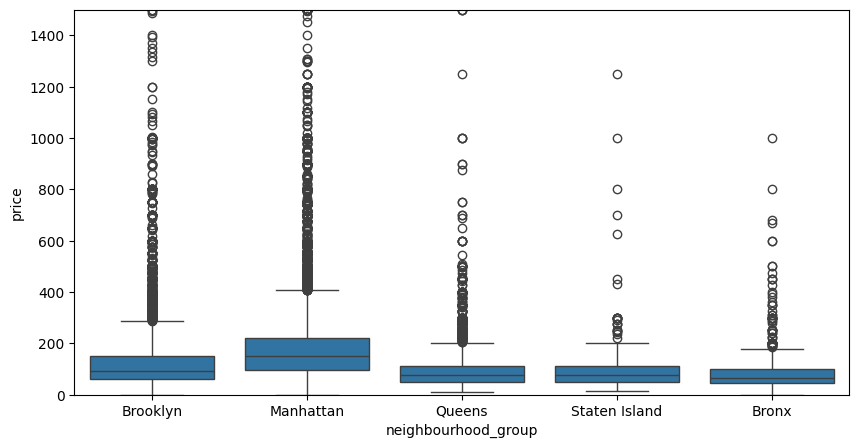

In [ ]:
plt.figure(figsize=(10,5))
plt.ylim(0,1500)
sns.boxplot(x='neighbourhood_group', y='price',data=airbnb_df)
plt.show()

In [ ]:
len(airbnb_df[airbnb_df['price']>500])

1044

**We can see that price varies from 0 till 10,000 but there are a wide range of outliers present in here. We will try to minimize the outliers instead of removing them completely as we don't want to lose any data in here.We observed there are only 1044 records which are having more than 500 as the price. So just taking the price of property which are more than 500 as 600, which will just minimize the number of outliers.**

In [ ]:
airbnb_df['price'][airbnb_df['price']>600] = 600


<ipython-input-19-45fcf2c366ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_df['price'][airbnb_df['price']>600] = 600


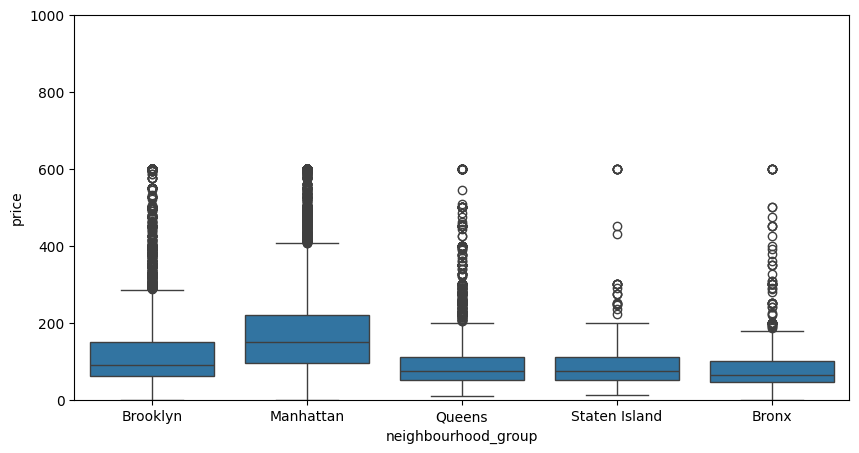

In [ ]:
plt.figure(figsize=(10,5))
plt.ylim(0,1000)
sns.boxplot(x='neighbourhood_group', y='price',data=airbnb_df)
plt.show()

6)Now we even treated outliers(just minimized) and treated NaN, we will start with analysing what observations can be drawn from the dataframe in here.

**Exploratory Data Analysis (EDA)**

1) **Rentals/properties present in Neighbourhood group , Neighbourhood, Room type**

2) **No. of rentals/properties which are grouped by room_type in each neighbourhood**

In [ ]:
airbnb_df.groupby(['neighbourhood_group'],dropna=True)['room_type'].value_counts()


neighbourhood_group  room_type      
Bronx                Private room         652
                     Entire home/apt      379
                     Shared room           60
Brooklyn             Private room       10132
                     Entire home/apt     9559
                     Shared room          413
Manhattan            Entire home/apt    13199
                     Private room        7982
                     Shared room          480
Queens               Private room        3372
                     Entire home/apt     2096
                     Shared room          198
Staten Island        Private room         188
                     Entire home/apt      176
                     Shared room            9
Name: room_type, dtype: int64

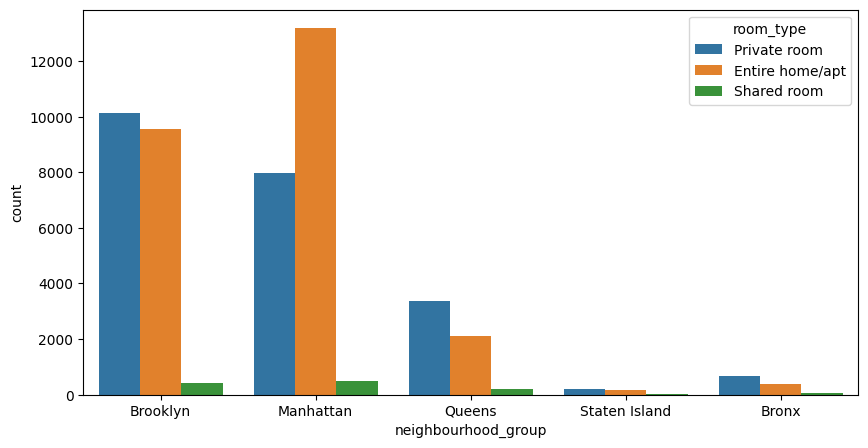

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='neighbourhood_group', hue='room_type', data=airbnb_df)
plt.show()

Throughout NY, we have our properties located in 5 neighbourhood group. Clearly we can see that the cities Manhattan and Brooklyn are the cities with most number of properties. We can even obseve the room_type in here.

There are 3 categories available in room_type. And we can even observe the number of properties in each room_type in those 5 cities. We can get the conclusion,

(1)more number of properties of home are avialbale in Manhattan when compared to all cities

(2)the private room properties are varying from cities to cities. Count of private roomtypes are all high/almost equal to the number of home properties except Manhattan

(3)shared room properties are very few in all cities

b**)Total number of rentals/properties in each neighbourhood group**


In [ ]:
n = airbnb_df.neighbourhood_group.unique()
nbd_grp = list(n)

In [ ]:
def plot_nbd():
  plt.figure(figsize=(10,5))
  nbd_cnts=[]
  for i in nbd_grp:
    nbd_cnts.append(airbnb_df['id'][airbnb_df['neighbourhood_group']==i].value_counts().sum())

  plt.plot(nbd_grp,nbd_cnts)

  plt.legend(nbd_grp)
  print(nbd_cnts)

[20104, 21661, 5666, 373, 1091]


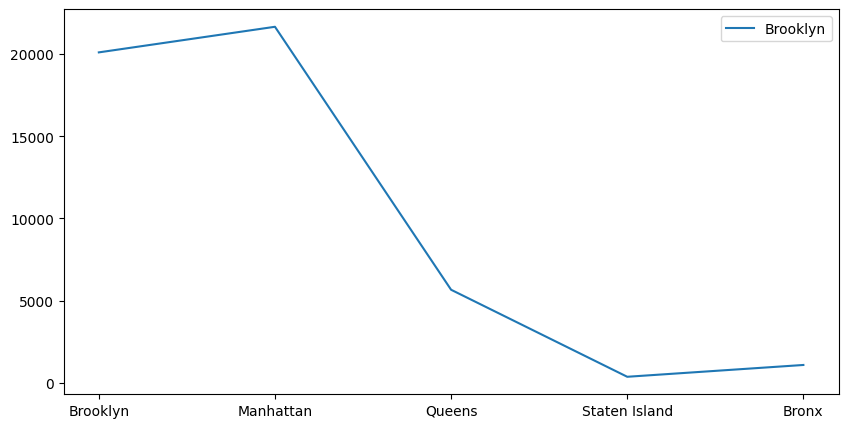

In [ ]:
plot_nbd()

This gives information about the count of properties present in those 5 cities. We can observe that Brooklyn and Manhattan has more properties when compared to all 5 cities. In particular, Manhattan is the city which is busy city with most properties to offer.

# **c)Total count of room types available in NYC**

In [ ]:
airbnb_df['room_type'].value_counts()


Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

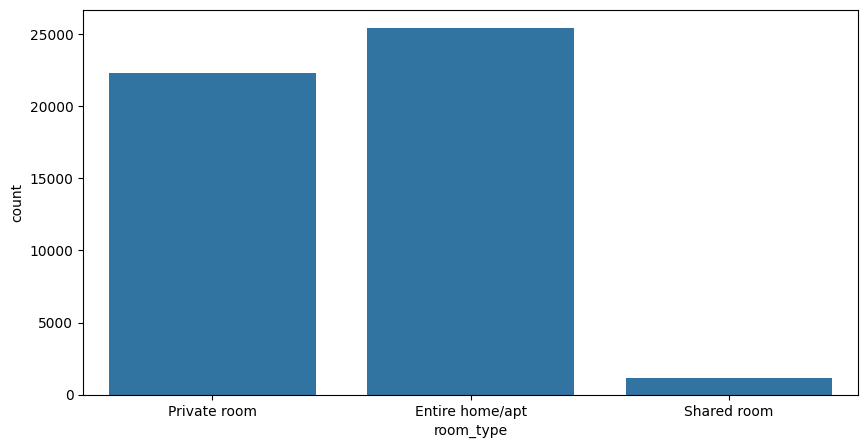

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='room_type', data= airbnb_df)
plt.show()

Overall just trying to fetch more information about the room_types in general, we have more properties in home/apt. We already know that home/apt is most demanded room_type throughout NY.

# **d) Overall contributions of each neighbourhood in the count of listings throughout NYC**


([<matplotlib.patches.Wedge at 0x7b743ead8580>,
 [Text(-0.19589098201007532, -1.0824170744990715, 'Manhattan'),
  Text(0.6544005041792901, 0.8841719177455768, 'Brooklyn'),
  Text(-0.9365212904925622, 0.5769990229230428, 'Queens'),
  Text(-1.0923467232360349, 0.12953237524070008, 'Bronx'),
  Text(-1.0996841146061016, 0.02635997122522387, 'Staten Island')],
 [Text(-0.10684962655095016, -0.5904093133631299, '44.3%'),
  Text(0.35694572955234, 0.4822755914975873, '41.1%'),
  Text(-0.5108297948141248, 0.3147267397762052, '11.6%'),
  Text(-0.5958254854014735, 0.07065402285856368, '2.2%'),
  Text(-0.5998276988760554, 0.014378166122849381, '0.8%')])

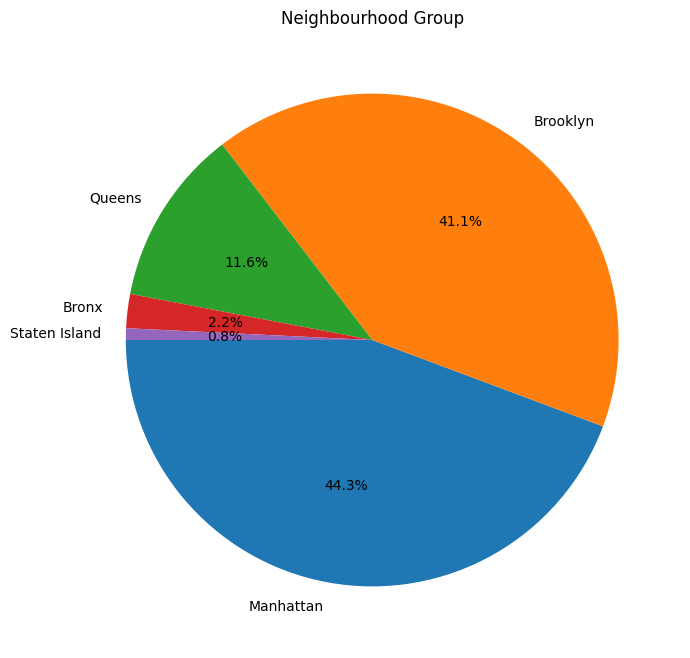

In [ ]:
plt.figure(figsize=(20,8))
plt.title("Neighbourhood Group")
plt.pie(airbnb_df.neighbourhood_group.value_counts(), labels=airbnb_df.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)

The more number of listings are observed in Manhattan as it takes the 44.3% of the overall listings.



# **D)Availability_365 and the neighbourhood_group**


<Axes: xlabel='neighbourhood_group', ylabel='availability_365'>

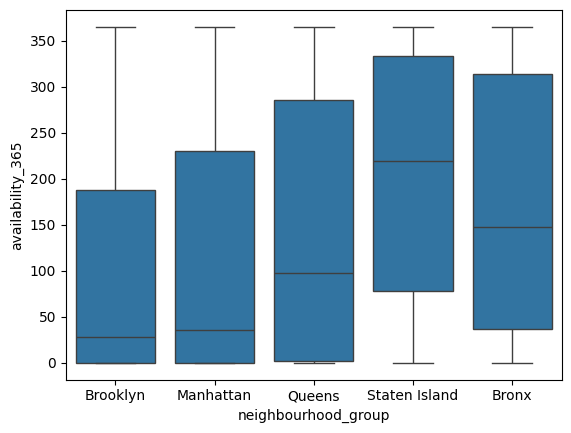

In [ ]:
sns.boxplot(data=airbnb_df, x='neighbourhood_group',y='availability_365')


sns.boxplot(data=airbnb_df, x='neighbourhood_group',y='availability_365')


# **2)Average price for each neighbourhood group**


We got to know that most properties are available in Manhattan. Now we even want to know the average price of all the properties for the citi

In [ ]:
avg_price_nbd= airbnb_df.groupby(['neighbourhood_group','room_type'],dropna=True)['price'].mean().reset_index()
avg_price_nbd

,neighbourhood_group,room_type,price
0,Bronx,Entire home/apt,126.266491
1,Bronx,Private room,63.751534
2,Bronx,Shared room,56.466667
3,Brooklyn,Entire home/apt,168.437389
4,Brooklyn,Private room,73.328563
5,Brooklyn,Shared room,50.225182
6,Manhattan,Entire home/apt,223.726797
7,Manhattan,Private room,109.401027
8,Manhattan,Shared room,87.310417
9,Queens,Entire home/apt,142.643130


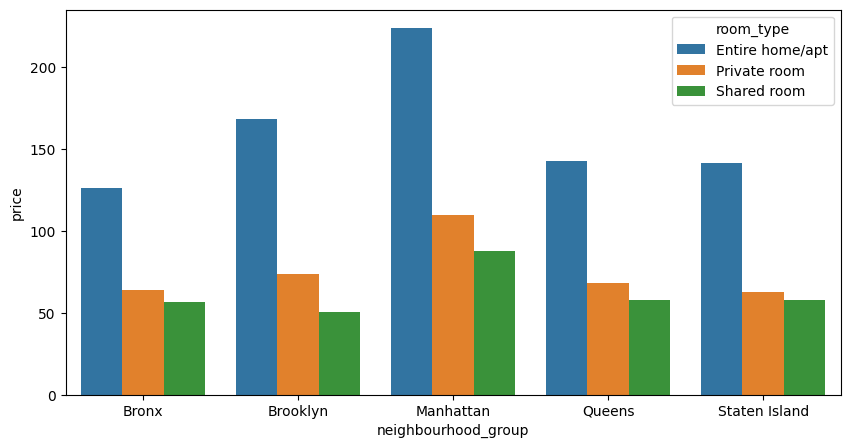

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='neighbourhood_group',y='price', hue='room_type', data=avg_price_nbd)
plt.show()

We can observe that, Manhattan is the city which is in lead in all aspects. Its price for all room_type properties are pretty high when compared to the rest of the cities. Indeed its busy and famous

In [ ]:
airbnb_df.groupby(['neighbourhood_group'])['price'].mean().reset_index()

,neighbourhood_group,price
0,Bronx,85.067828
1,Brooklyn,118.076055
2,Manhattan,178.575227
3,Queens,95.420755
4,Staten Island,99.329759


In [ ]:
def nbd_avg_price(df,x_axis,y_axis):
  group_price = df.groupby([x_axis],as_index=False)[y_axis].mean().reset_index(drop=True)
  plt.figure(figsize=(10,5))
  sns.barplot(x=group_price[x_axis],y=group_price[y_axis])
  plt.ylabel('mean ' + y_axis)
  plt.show()

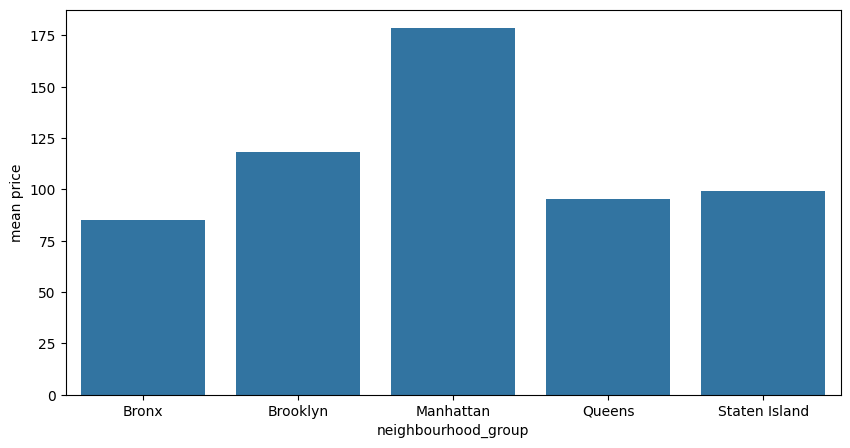

In [ ]:
nbd_avg_price(airbnb_df,'neighbourhood_group','price')

We already saw that Manhattan is the city which has high price for all the room_type properties. Now in here,we just tried to fetch a visualization of price with neighbourhood_group alone.

# **3)Average Price for each neighbourhood areas in respective neighbourhood_groups**

Trying to obsere the trend of price for each areas/neighbourhood in those cities.

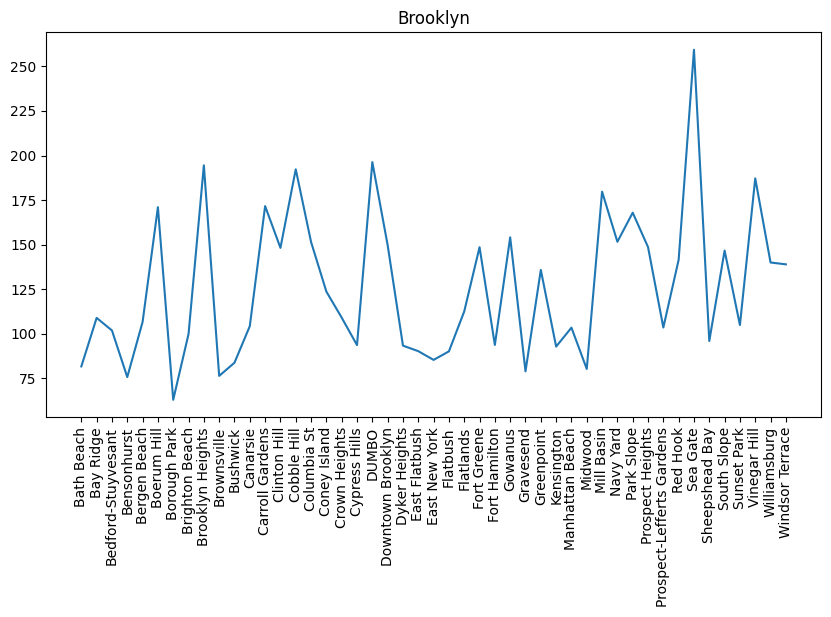

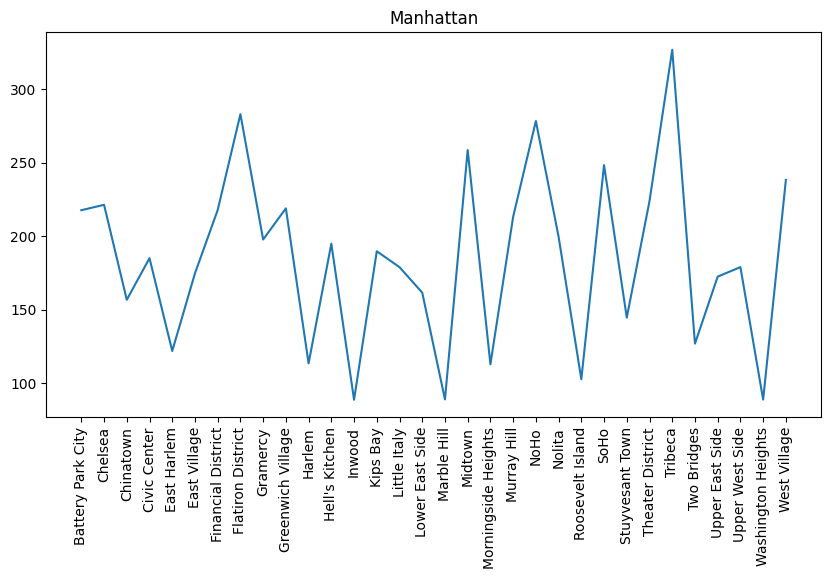

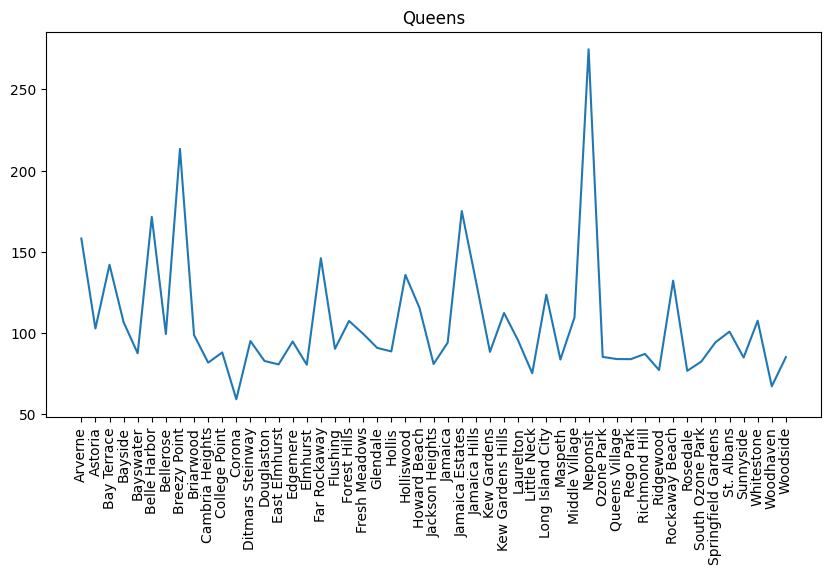

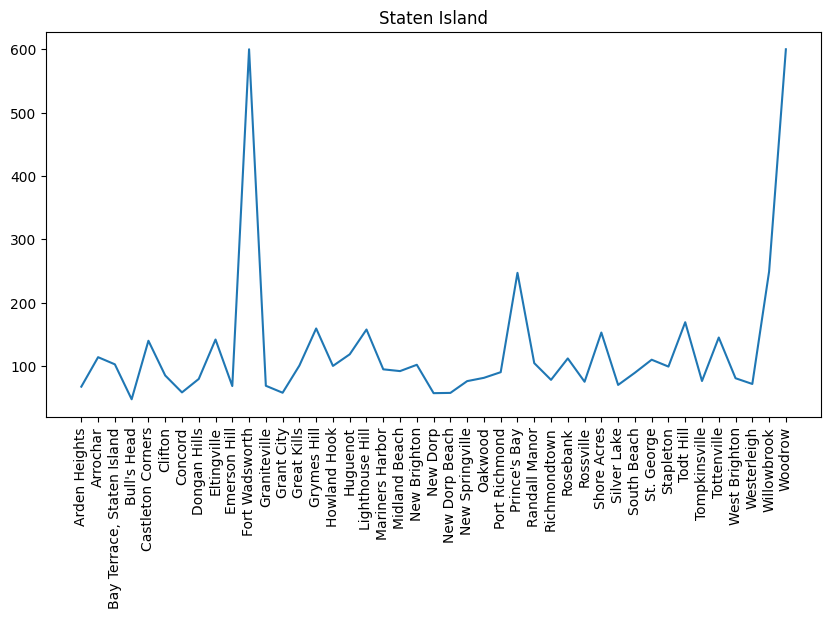

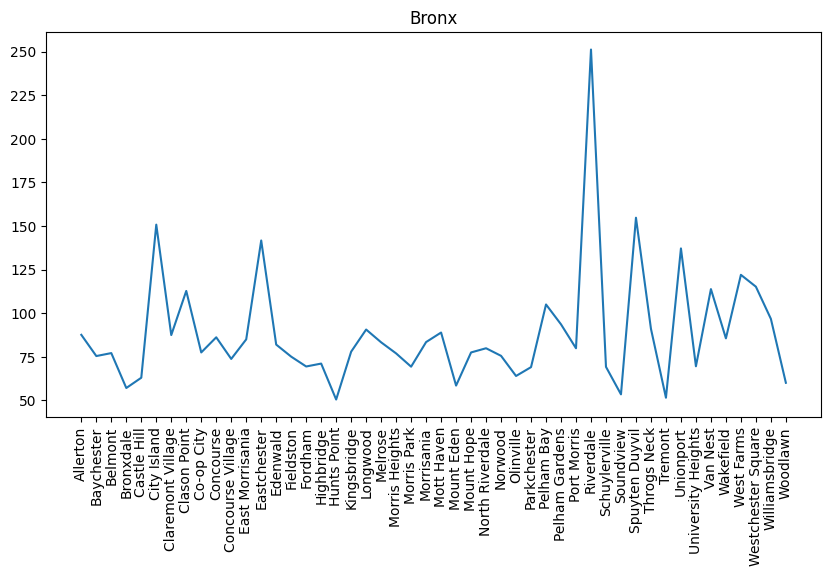

In [ ]:
for i in nbd_grp:
  nbd_price= airbnb_df[airbnb_df['neighbourhood_group']==i].groupby(['neighbourhood'])['price'].mean().reset_index(drop=False)
  nbd_price = pd.DataFrame(nbd_price)
  plt.figure(figsize=(10,5))
  plt.xticks(rotation=90)
  plt.title(i)
  plt.plot(nbd_price['neighbourhood'],nbd_price['price'])

We can observe that many cities are having very fluctuating price in their neighbourhood.Especially Manhattan is the city which has even very less price and even very high price in its neighbourhood.

# **4) Price distribution data in every neighbourhood_group**

We already saw the price variation for the neighbourhood of each neighbourhood group.Now we trying to see some price distribution for each neighbour_group alone or i can say for the 5 cities.

In [ ]:
for i in nbd_grp:
  df_price=pd.DataFrame(airbnb_df['price'][airbnb_df['neighbourhood_group']==i])
  print(i)
  print(df_price.describe(),"\n")

Brooklyn
              price
count  20104.000000
mean     118.076055
std       90.754986
min        0.000000
25%       60.000000
50%       90.000000
75%      150.000000
max      600.000000 

Manhattan
              price
count  21661.000000
mean     178.575227
std      122.829107
min        0.000000
25%       95.000000
50%      150.000000
75%      220.000000
max      600.000000 

Queens
             price
count  5666.000000
mean     95.420755
std      73.264768
min      10.000000
25%      50.000000
50%      75.000000
75%     110.000000
max     600.000000 

Staten Island
            price
count  373.000000
mean    99.329759
std     89.573878
min     13.000000
25%     50.000000
50%     75.000000
75%    110.000000
max    600.000000 

Bronx
             price
count  1091.000000
mean     85.067828
std      73.370375
min       0.000000
25%      45.000000
50%      65.000000
75%      99.000000
max     600.000000 



# **5)Overall Price distribution throught NY**

Till now we discussed the price range only for neighbouhood / neighbourhood_group / room_type. Now lets focus on how well the price is varying throughout NY.




<ipython-input-37-5908f81e8e12>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(airbnb_df['price'],bins=10,kde=True)


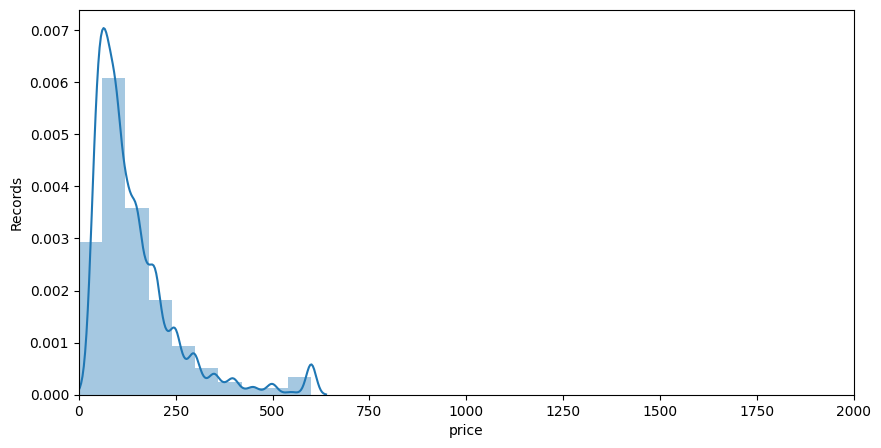

In [ ]:
plt.figure(figsize=(10,5))
plt.xlim(0,2000)
plt.xlabel('Price')
plt.ylabel('Records')
sns.distplot(airbnb_df['price'],bins=10,kde=True)
plt.show()
#A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram.

We can observe that most of the price are in between the range 0 to 250.( We can say those properties are not that high until you want to opt for a fancy property with high price.)



# **6)In search of a famous Host**

Here I tried searching the famous host, i felt that whoever has the most number of properties(doesn't matter if its a private room/home/shared room) is the famous host. He has been offering those properties for the customers. And if the property count is more that means he has more to offer. So obviously he is the one famous host.

In [ ]:
famous_host = airbnb_df['host_id'].value_counts().head(20)
famous_host = pd.DataFrame(famous_host)
famous_host.reset_index(inplace=True)
famous_host.rename(columns={'index':'Host_id','host_id':'Count'},inplace=True)
famous_host.head(2)

,Host_id,Count
0,219517861,327
1,107434423,232


<ipython-input-39-21e4cead5ad1>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt1.set_xticklabels(plt1.get_xticklabels(), rotation=90)


[Text(0, 0, '1475015'),
 Text(1, 0, '2119276'),
 Text(2, 0, '2856748'),
 Text(3, 0, '7503643'),
 Text(4, 0, '12243051'),
 Text(5, 0, '16098958'),
 Text(6, 0, '19303369'),
 Text(7, 0, '22541573'),
 Text(8, 0, '25237492'),
 Text(9, 0, '26377263'),
 Text(10, 0, '30283594'),
 Text(11, 0, '61391963'),
 Text(12, 0, '107434423'),
 Text(13, 0, '119669058'),
 Text(14, 0, '120762452'),
 Text(15, 0, '137358866'),
 Text(16, 0, '190921808'),
 Text(17, 0, '200380610'),
 Text(18, 0, '205031545'),
 Text(19, 0, '219517861')]

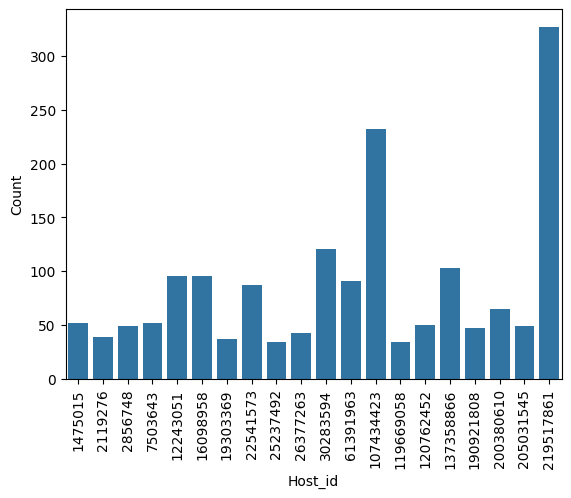

In [ ]:
plt1 = sns.barplot(x='Host_id',y='Count',data=famous_host)
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=90)

Above is the visualization which describes top 10 hosts whoever has the most number of properties to offer.

In [ ]:
top_host_id = famous_host['Host_id'][famous_host['Count']==famous_host['Count'].max()]
top_host_name = airbnb_df[['host_name','neighbourhood_group']][airbnb_df['host_id']==top_host_id[0]].head(1)
top_host_name

,host_name,neighbourhood_group
38293,Sonder (NYC),Manhattan


In [ ]:
airbnb_df[['neighbourhood_group','neighbourhood','room_type','price','availability_365']][airbnb_df['host_id']==top_host_id[0]]


,neighbourhood_group,neighbourhood,room_type,price,availability_365
38293,Manhattan,Financial District,Entire home/apt,302,309
38294,Manhattan,Financial District,Entire home/apt,229,219
38588,Manhattan,Financial District,Entire home/apt,232,159
39769,Manhattan,Murray Hill,Entire home/apt,262,91
39770,Manhattan,Murray Hill,Entire home/apt,255,81
...,...,...,...,...,...
47691,Manhattan,Financial District,Entire home/apt,135,339
47692,Manhattan,Financial District,Entire home/apt,165,342
47693,Manhattan,Financial District,Entire home/apt,165,347
47814,Manhattan,Financial District,Entire home/apt,600,327


Sonder, who we concluded that as famous host, has all the properties in Manhattan.

(1)He is offering many properties with almost all as 'Entire_home'.

(2)He has many properties in Financial Distict which may be more famous or i can say affordable to all. Because we can see the price as well, its reasonable one(not high/not low).

(3)We can even check that all the properties are available for almost 300+days.

So we can conclude that he is the famous one because he possesses the best properties(home properties) in best place(Manhattan).

# **7)Number_of_reviews**


We tried analysing the data with respect to neighbourhood_group, neighbourhood, room_type, host_id and price. Now we will try to analyse Number of reviews and we will see what intrepretation we can get from here.

In [ ]:
top_reviewed_place=airbnb_df.nlargest(10,'number_of_reviews')
top_reviewed_place.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,333
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,293
2030,903947,Beautiful Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,342


1)Average price for the most_reviewed place:

In [ ]:
price_avrg=top_reviewed_place.price.mean()
print('Average price per night: {}'.format(price_avrg))

Average price per night: 65.4


Most reviewd place has the average price per stay as 65.4



# **2)with respect to host**

In [ ]:
nor_host = airbnb_df.groupby(['host_id','host_name'])['number_of_reviews'].max().reset_index()
nor_host = nor_host.sort_values(['number_of_reviews'],ascending=False).head(10)
nor_host

,host_id,host_name,number_of_reviews
23486,47621202,Dona,629
7362,4734398,Jj,607
21304,37312959,Maya,543
4367,2369681,Carol,540
18626,26432133,Danielle,510
13109,12949460,Asa,488
1864,792159,Wanda,480
4818,2680820,Linda,474
147,42273,Dani,467
17517,23591164,Angela,466


<ipython-input-49-516a1c6a7538>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt2.set_xticklabels(plt2.get_xticklabels(), rotation=90)


[Text(0, 0, 'Dona'),
 Text(1, 0, 'Jj'),
 Text(2, 0, 'Maya'),
 Text(3, 0, 'Carol'),
 Text(4, 0, 'Danielle'),
 Text(5, 0, 'Asa'),
 Text(6, 0, 'Wanda'),
 Text(7, 0, 'Linda'),
 Text(8, 0, 'Dani'),
 Text(9, 0, 'Angela')]

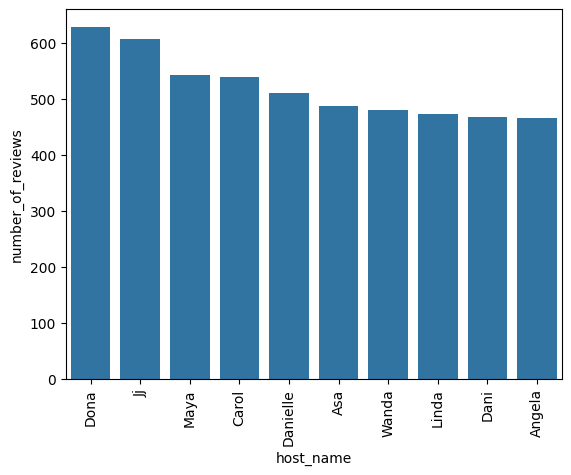

In [ ]:
plt2 = sns.barplot(x=nor_host['host_name'],y=nor_host['number_of_reviews'])
plt2.set_xticklabels(plt2.get_xticklabels(), rotation=90)

We found the top 10 hosts whose place got the most number of reviews.



# **3)Number of reviews for each neighbourhood_group**



In [ ]:
nor_nbd_grp = airbnb_df.groupby(['neighbourhood_group','room_type'])['number_of_reviews'].max().reset_index()
nor_nbd_grp

,neighbourhood_group,room_type,number_of_reviews
0,Bronx,Entire home/apt,271
1,Bronx,Private room,321
2,Bronx,Shared room,116
3,Brooklyn,Entire home/apt,488
4,Brooklyn,Private room,480
5,Brooklyn,Shared room,236
6,Manhattan,Entire home/apt,447
7,Manhattan,Private room,607
8,Manhattan,Shared room,229
9,Queens,Entire home/apt,441


<Axes: xlabel='neighbourhood_group', ylabel='number_of_reviews'>

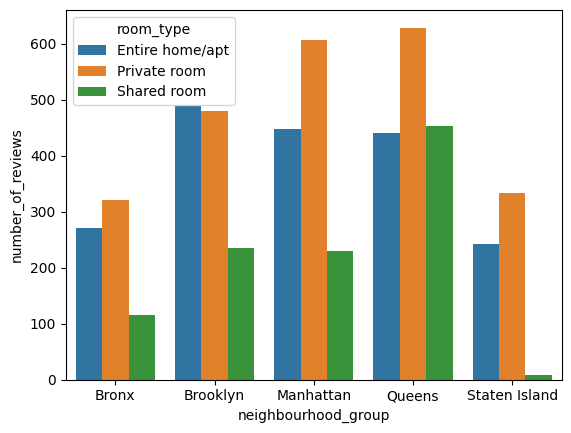

In [ ]:
sns.barplot(x=nor_nbd_grp['neighbourhood_group'],hue=nor_nbd_grp['room_type'],y=nor_nbd_grp['number_of_reviews'])


We can observe that Queens has the most_reviewed place in NY. Through this visualization we will get good comparision of the other neighbourhood as well.

Overall,

(1)So from the above result, we have the average price per night as 65.4.

(2)And we can observe that host_id 47621202 has most number of reviews for his property which is in Queens. We can even consider him as the famous host for some reason as he has most reviewed place in NY. Again its all upto our conception.

(3)the most reviewd place has very less price. That means we can conclude that the price which ever is very low, people tend to go to that home/private room. Hence it got most number of reviews.

(4)From observed data (above 4 result), we have the total number of properties in Queens is 5666 and out of which Now we can see that 629 reviews were on single property. Its pretty good. So we can come to the conclusion that Queens is the place/city which got most reviewd place. It may be because its comparibly cheap when it compared to other cities like Manhattan/Brooklyn.

(5) The top reviewed place was available for almost 333days out of 365 days of a year. Which gives us good picture that people tend to choose the property with less price and which is mostly available.

# **8)Average price for room_type throughout NY.**

Now we are focusing on the column room_type alone. We trying to find the average price for all room types throughout NY.

In [ ]:
#avg_price_room_type = airbnb_df.groupby(['room_type']).agg({'price': ['mean', 'min', 'max']})
avg_price_room_type = airbnb_df.groupby(['room_type'])['price'].mean().reset_index()
avg_price_room_type

,room_type,price
0,Entire home/apt,194.211500
1,Private room,85.090881
2,Shared room,67.218103


<Axes: xlabel='room_type', ylabel='price'>

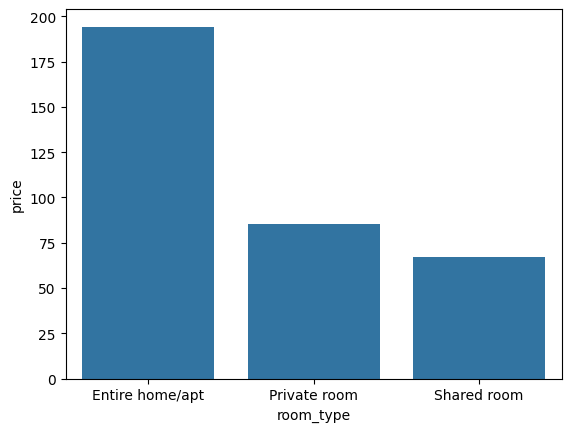

In [ ]:
sns.barplot(x="room_type", y="price", data=avg_price_room_type)

We can see that Entire home/Apt is in demand and it has the price high when compared to private_room/shared_room.



# **9)Average price of the place which is most available**


In [ ]:
most_available_place=airbnb_df.nlargest(10,'availability_365')
most_available_place.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,365


In [ ]:
price_avrg=most_available_place.price.mean()
print('Average price of most avialble place: {}'.format(price_avrg))

Average price of most avialble place: 150.3


We got to know that the average price for most available place is 150.3.We can see that its quite reasonable when compared to price range in total.

# **10)Average price in descending order based on minimum_nights of stay**


In [ ]:
min_nights_stay = airbnb_df.groupby(['minimum_nights','neighbourhood_group','neighbourhood'],dropna=True)['price'].mean().reset_index()


In [ ]:
min_nights_stay.sort_values('minimum_nights',ascending=False,inplace=True)
min_nights_stay

,minimum_nights,neighbourhood_group,neighbourhood,price
2331,1250,Manhattan,Greenwich Village,180.000000
2330,1000,Manhattan,Battery Park City,400.000000
2329,999,Manhattan,Harlem,99.000000
2328,999,Manhattan,Greenwich Village,110.000000
2327,999,Brooklyn,Williamsburg,79.000000
...,...,...,...,...
134,1,Queens,Corona,48.891892
133,1,Queens,College Point,67.571429
132,1,Queens,Cambria Heights,76.416667
131,1,Queens,Briarwood,78.566667


Text(0, 0.5, 'Price')

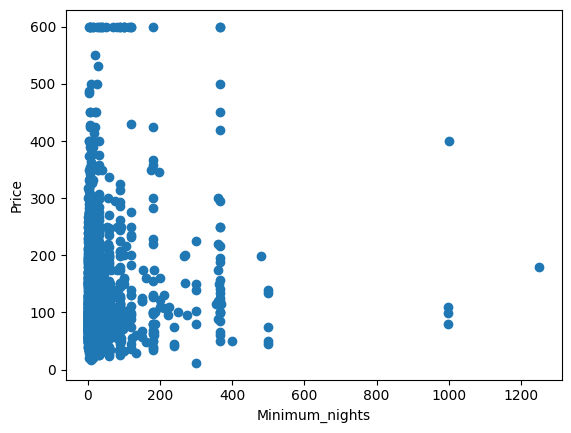

In [ ]:
plt.scatter(min_nights_stay['minimum_nights'],min_nights_stay['price'])
plt.xlabel('Minimum_nights')
plt.ylabel('Price')

We can clearly observe that we can't get much intrepetion from minimum_number_of_nights and price visualization. Even there are places with less price which has the minimum_nights as 1000 and vice versa. Because it mainly depends on the neighbourhood_group/city where you are staying.

# **11) Average price per night**


In [ ]:
x = ['neighbourhood_group','room_type','minimum_nights','price']
prvsmin = airbnb_df[x]
prvsmin.head(5)

,neighbourhood_group,room_type,minimum_nights,price
0,Brooklyn,Private room,1,149
1,Manhattan,Entire home/apt,1,225
2,Manhattan,Private room,3,150
3,Brooklyn,Entire home/apt,1,89
4,Manhattan,Entire home/apt,10,80


In [ ]:
# creating a new column which gives price per a single night
prvsmin['price_per_night'] = prvsmin['price']/prvsmin['minimum_nights']
prvsmin.head(5)

<ipython-input-62-6c0ceff0feea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prvsmin['price_per_night'] = prvsmin['price']/prvsmin['minimum_nights']


,neighbourhood_group,room_type,minimum_nights,price,price_per_night
0,Brooklyn,Private room,1,149,149.0
1,Manhattan,Entire home/apt,1,225,225.0
2,Manhattan,Private room,3,150,50.0
3,Brooklyn,Entire home/apt,1,89,89.0
4,Manhattan,Entire home/apt,10,80,8.0


# **(a) Average price per night for each neighbourhood along with room_type**


In [ ]:
# finding the average price for each neighbourhood
avg_price_per_night_nbd = prvsmin.groupby(['neighbourhood_group','room_type'])['price'].mean().reset_index()
avg_price_per_night_nbd

,neighbourhood_group,room_type,price
0,Bronx,Entire home/apt,126.266491
1,Bronx,Private room,63.751534
2,Bronx,Shared room,56.466667
3,Brooklyn,Entire home/apt,168.437389
4,Brooklyn,Private room,73.328563
5,Brooklyn,Shared room,50.225182
6,Manhattan,Entire home/apt,223.726797
7,Manhattan,Private room,109.401027
8,Manhattan,Shared room,87.310417
9,Queens,Entire home/apt,142.643130


<Axes: xlabel='neighbourhood_group', ylabel='price'>

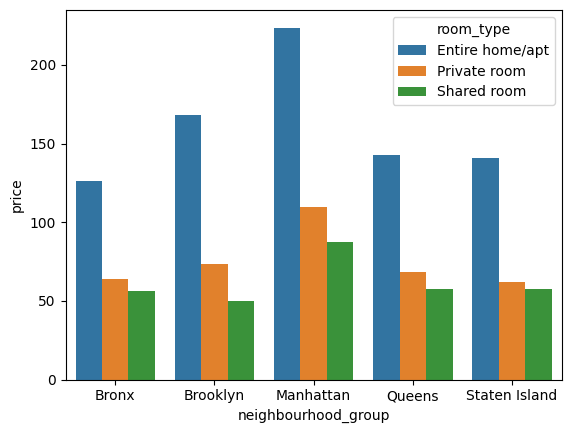

In [ ]:
sns.barplot(x=avg_price_per_night_nbd['neighbourhood_group'],hue=avg_price_per_night_nbd['room_type'],y=avg_price_per_night_nbd['price'])


Over all, we can see that in every neighbourhood group, Entire home/apartment has the price high. And Manhattan is the neighbourhood which average price is high in all room types.

# **(b) Average price per night for all 5 neighbourhood**


In [ ]:
avg_price_per_night = prvsmin.groupby(['neighbourhood_group'])['price'].mean().reset_index()
avg_price_per_night

,neighbourhood_group,price
0,Bronx,85.067828
1,Brooklyn,118.076055
2,Manhattan,178.575227
3,Queens,95.420755
4,Staten Island,99.329759


In [ ]:
import seaborn as sns

<Axes: xlabel='neighbourhood_group', ylabel='price'>

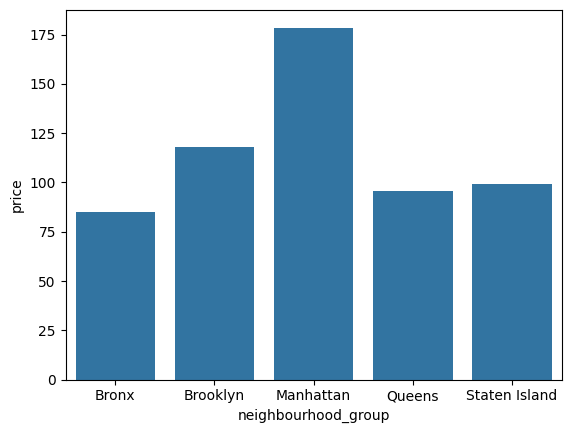

In [ ]:
sns.barplot(x="neighbourhood_group", y="price", data=avg_price_per_night)


We can see that average price per night is high in Manhattan followed by Brooklyn.



# **(c) Average price per night for each room type throughout New York**


In [ ]:
avg_price_per_night_nbd_room_type = prvsmin.groupby(['room_type'])['price'].mean().reset_index()
avg_price_per_night_nbd_room_type

,room_type,price
0,Entire home/apt,194.211500
1,Private room,85.090881
2,Shared room,67.218103


<Axes: xlabel='room_type', ylabel='price'>

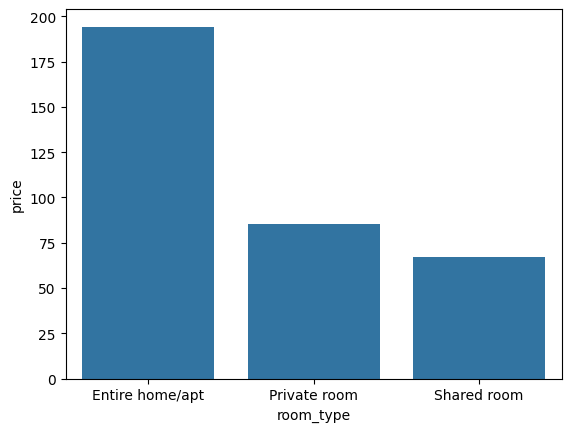

In [ ]:
sns.barplot(x="room_type", y="price", data=avg_price_per_night_nbd_room_type)


We can observe that Entire home/Apartment price per night is high when compared to other room types



# **12)Longitude and Latitude**

We considered all possible columns for visualization. Why not Longitude and Latitude ? Here we are just trying to do the visualization even more attractive with the fancy maps of geological graph.

**(1)Map based on properties of Neighbourhood_group/cities**

<Axes: xlabel='longitude', ylabel='latitude'>

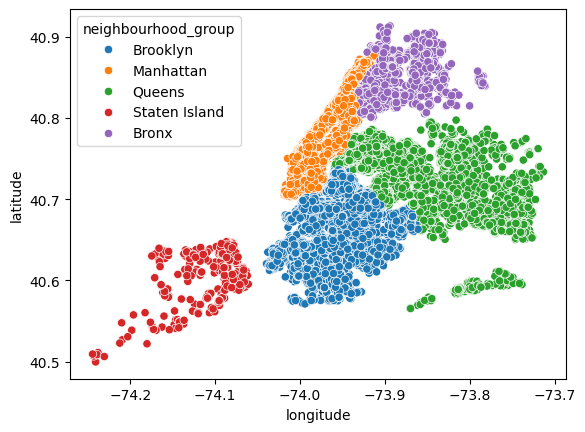

In [ ]:
#viasualizinf the newyork map from the goven data
sns.scatterplot(x="longitude", y="latitude", hue="neighbourhood_group", data=airbnb_df)


**(2)Maps with respect to room_types available throughout NY**



<Axes: xlabel='longitude', ylabel='latitude'>

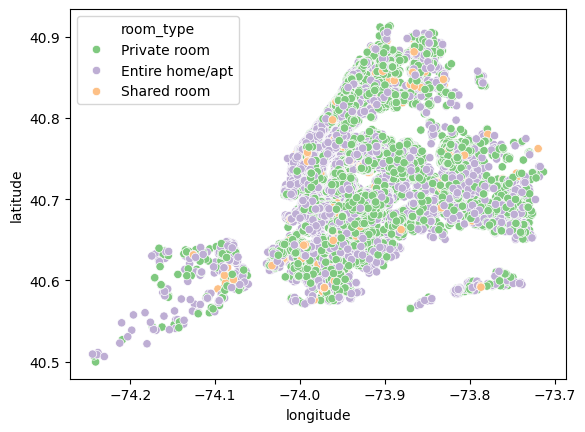

In [ ]:
sns.scatterplot(x="longitude", y="latitude", hue="room_type", palette="Accent", data=airbnb_df)


# **(3)Maps which tells us about the price variation of all available propertie**s

<Axes: xlabel='longitude', ylabel='latitude'>

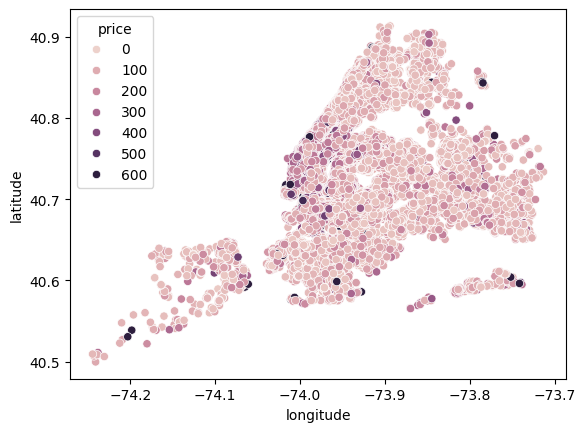

In [ ]:
sns.scatterplot(x="longitude", y="latitude", hue="price", data=airbnb_df)


# **Conclusion:**

(1) Price depends on Neighbourhood_group. Its high in Manhattan.

(2) Within neighbourhood_groups, price fluctuates between the range. But Manhattan is the place where we see alot ups and downs in price, giving the colclusion that Manhattan is the city which contains highest price and aswell as lowest price.

(3) We can get the famous host (Sonder from Manhattan) from the number of properties he is offering (OR) We can find the famous host(Jordan from Queens) with respect to most reviewed place as well.

(4) People reviewed at most in properties of Queens which has the lowest prices for their properties as well.

(5) Throughout NY, Entire home/apt is the room_type which is mostly in demand.

(6) Manhattan is the place which is famous and can be a good option for the companies to invest on properties of Entire home/Apt.